# Exercise 04:  Non-Linear-Optimization Function + Student Exercise
**Objectives of the lesson:**

1. Given Data Points & Function-Parameters
2. Residuum Calculation
3. Jacobi Matrix Calculation
4. Gauss-Newton Optimization Calculation - Student Exercise
5. Gradient-Descent Optimization Calculation - Student Exercise
6. Plotting Optimization Results

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Given Data Points & Function-Parameters 
**Function: <br>** f(a, b, c) : yi = |(a * (xi^2)) + (b * xi)| + c

In [3]:
# # data points: (-1,5.124), (0,2.023), (1,4.6445), (3, 2.222), (4, 6.432)
function_points = np.array([[-1,5.124], [0,2.023], [1,4.6445], [3, 2.222], [4, 6.432]])

# function parameters = (a, b, c) = (4, 1, 0)
function_parameters = np.array([[4], [1], [0]])

**Mathematical definition of signum:**

In [4]:
def sgn(x):
    if(x > 0 ):
        return 1
    else:
        return -1

## 2. Residuum Calculation
**Dimensions of Residuum Vector:** <br>
nx1<br>
n : count of data points

In [5]:
def res_func(fpo, fpa):
    # optimization function f(a, b, c) = yi - |(a * (xi^2)) + (b * xi)| - c, xi & yi are function_points
    
    # shaping corresponding residuum container, number of residuum rows  == number of counted datapoints
    residuum = np.zeros((fpo.shape[0], 1))

    index = 0 

    # calculating residuum container for i given datapoints
    for i in fpo:
        residuum[index] = i[1] - np.linalg.norm((fpa[0] * np.square(i[0]) + (fpa[1] * i[0]))) - fpa[2]
        index = index +1
        
    return residuum

## 3. Jacobi Matrix Calculation
**Dimensions of Residuum Vector:** <br>
nxm <br>
n : count of data points <br>
m : count of parameters Residuum-Function

In [6]:
# derivation a: f = -(xi^2) * sgn((a * (xi^2)) + (b * xi))
# derivation b: f =  -xi * sgn((a * (xi^2)) + (b * xi))
# derivation c : f = -1

def jacobi_matrix(fpo, fpa):
    
    # shaping corresponding jacobi matrix
    # number of jacobi matrix rows  == number of counted datapoints
    # number of jacobi matrix columns  == number of counted circle parameters
    jacobi = np.zeros((fpo.shape[0], fpa.shape[0]))

    index = 0

    # calculating jacobi matrix row-wise for every given datapoint
    for i in fpo:
        jacobi[index][0] = - np.square(i[0]) * sgn((fpa[0] * np.square(i[0])) + (fpa[1] * i[0]))
        jacobi[index][1] = - i[0] * sgn((fpa[0] * np.square(i[0])) + (fpa[1] * i[0]))
        jacobi[index][2] = -1
        index = index +1

    return jacobi

## 4. Gauss-Newton Optimization Calculation - Student Exercise
**Gauss-Newton Optimization:**<br>
parameters = parameters - (jacobi_matrix ^-1) * residuum-vector <br>
parameters : given parameters at the beginning, not data points! Updated iteration-wise

In [7]:
max_iterations = 400
epsilon = 0.5

for i in range(max_iterations):
    ######### Student Exercise Start #########
    # calculate residuum vector
    res = res_func(function_points, function_parameters)
    # calculate jacobi matrix
    jac = jacobi_matrix(function_points, function_parameters)
    # More-Penrose inverse of jacobi matrix
    j_plus = np.dot(np.linalg.inv(np.dot(np.transpose(jac), jac)), np.transpose(jac))
    # update circle parameters - Gauss-Newton
    function_parameters = function_parameters - np.dot(j_plus, res)
    # epsilon break
    if np.linalg.norm(res) < epsilon:
            break    
    ######### Student Exercise End   #########
            
print("Optimized Function Parameters: \n", function_parameters)
print("Final Error Value: \n", np.linalg.norm(res))
# show results
plt.show()

Optimized Function Parameters: 
 [[ 0.913875  ]
 [-2.64253409]
 [ 2.16225909]]
Final Error Value: 
 1.0221549629003515


## 5. Gradient-Descent Optimization Calculation - Student Exercise
**Gradient-Descent Optimization:**<br>
parameters = parameters - gamma * (jacobi_matrix^T * residuum-vector) <br>
parameters : given parameters at the beginning, not data points!<br>
gamma : step-size for Gradient-Descent Optimization

In [9]:
max_iterations = 400
epsilon = 1.0
# stepsize for Gradient-Descent Optimization
gamma = 0.0019

for i in range(max_iterations):
    ######### Student Exercise Start #########
    # calculate residuum vector
    res = res_func(function_points, function_parameters)
    # calculate jacobi matrix
    jac = jacobi_matrix(function_points, function_parameters)
    # update circle parameters - Gradient-Descent Optimization
    function_parameters = function_parameters - (gamma * np.dot(np.transpose(jac), res))
    # epsilon break
    if np.linalg.norm(res) < epsilon:
            break
    ######### Student Exercise End   #########
    
print("Optimized Function Parameters: \n", function_parameters)
print("Final Error Value: \n", np.linalg.norm(res))

Optimized Function Parameters: 
 [[ 0.913875  ]
 [-2.64253409]
 [ 2.16225909]]
Final Error Value: 
 1.022154962900351


## 6. Plotting Optimization Results

Datapoints:
( -1.0 , 5.124 )
( 0.0 , 2.023 )
( 1.0 , 4.6445 )
( 3.0 , 2.222 )
( 4.0 , 6.432 )
Optimized Function:


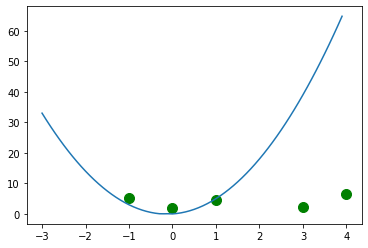

In [ ]:
# plotting range for calculated function parameters
t = np.arange(-3, 4, 0.1)
# calculating function values for plotting range
s = np.sqrt(np.square((function_parameters[0] * np.square(t)) + (function_parameters[1] * t))) + function_parameters[2]
# plot calculated function values
fig, ax = plt.subplots()
ax.plot(t, s)

print("Datapoints:")
# print data points
for i in range(np.shape(function_points)[0]):
    print("(" , function_points[i][0] , "," , function_points[i][1] , ")")
# plot data points
print("Optimized Function:")
for i in range(np.shape(function_points)[0]):
    plt.scatter(function_points[i][0], function_points[i][1], s=100, facecolors='g', edgecolors='g')

# show results
plt.show()